In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Ensure plots are displayed inline in Jupyter notebooks
%matplotlib inline


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df = pd.read_csv('/content/boston.csv')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76442a5930>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76442a5e70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76442a5690>,
 'medians': [<matplotlib.lines.Line2D at 0x7f76442a63b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f76442a6650>,
 'means': []}

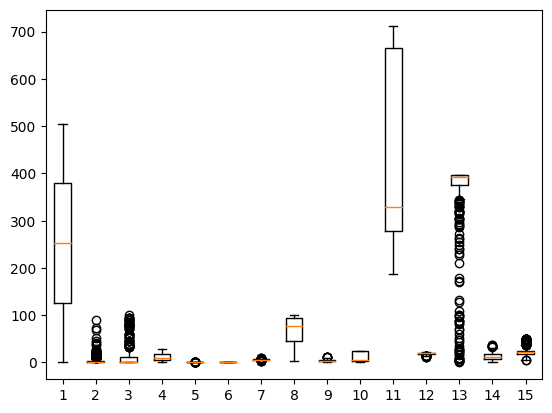

In [5]:
plt.boxplot(df)

In [6]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0


In [8]:
df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [9]:
# Print the description of the dataset
df.describe()

# Display the keys of the dataset
df.keys()

# Display the shape of the data
df.shape

# Display the first few rows of the DataFrame
df.head()

# Display the target values
df['PRICE']

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

(506, 15)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


Since we are building a linear regression model it may be helpful to generate the correlation matrix and then the correlation heatmap using the seaborn library

<Figure size 2000x2000 with 0 Axes>

<Axes: >

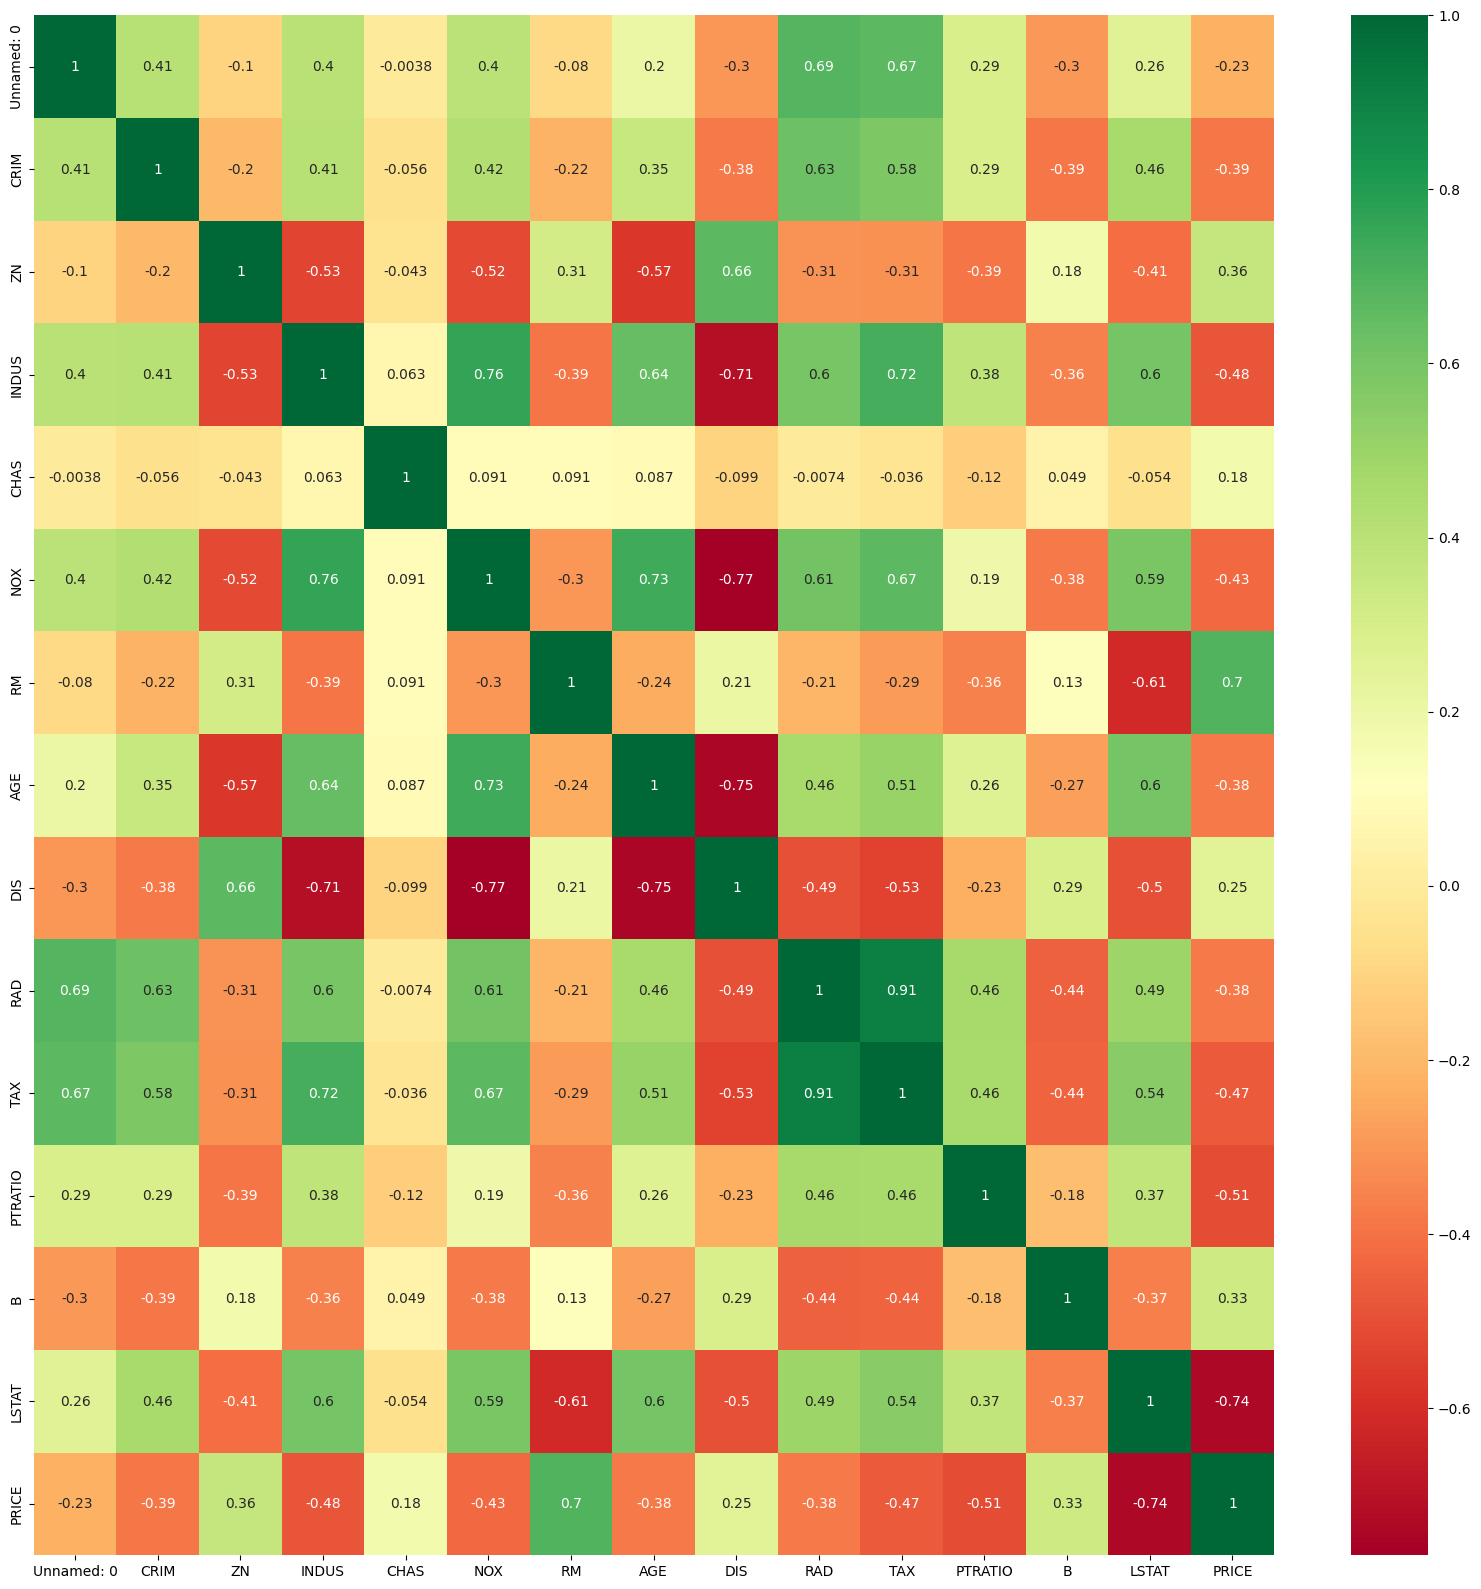

In [10]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='RdYlGn', annot=True)

# Show the plot
plt.show()

Create features and labels using Pandas  ‘.drop() ‘ method to drop certain variables. In this case we are dropping the house price as this is the label.

In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

x = df.drop('PRICE', axis=1)
y = df['PRICE']

# Apply scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert the scaled features back to a DataFrame
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

# Display the first few rows of the scaled features
x_scaled.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-1.728631,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-1.721785,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-1.714939,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-1.708093,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-1.701247,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [12]:
x = x_scaled
# Display the first few rows of the features DataFrame
x.head()

# Display the first few rows of the target variable
y.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-1.728631,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-1.721785,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-1.714939,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-1.708093,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-1.701247,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Split the data into the training and test datasets

In [13]:
# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=1)

# Display the shape of the training and testing sets
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(379, 14)

(127, 14)

(379,)

(127,)

Instantiate– import the model object and create an instance of the model

In [14]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
lrm = LinearRegression()

# Display the LinearRegression instance
lrm


LinearRegression()

Fit – Fit the model instant on the training data using ‘ .fit() ‘ method. Note that we are passing on both the features and label here


In [15]:
# Fit the model to the training data
lrm.fit(train_x, train_y)


LinearRegression()

Predict– Predict using the model instant and training done on the training data using ‘ .predict() ‘ method. Please note that here we are only passing on the features and having the model predict the values of the label.

In [16]:
# Make predictions on the test data
predictions = lrm.predict(test_x)

# Display the predictions
predictions

array([32.13231834, 27.6533715 , 18.20772327, 21.98339116, 19.11383194,
       20.11724254, 32.21454252, 18.34651136, 24.57381003, 26.99121441,
       27.09807615, 28.327991  , 21.43125944, 27.42978185, 22.94078366,
       20.93312587, 17.23013649, 37.69864525, 30.58711694,  8.53112265,
       20.4246671 , 16.35558888, 24.69687415, 24.42251287, 31.9486532 ,
       10.99550501, 14.09068946, 16.23113694, 35.74200249, 14.77648425,
       20.85098328, 13.94152719, 42.90581046, 17.76491961, 21.45538838,
       19.68276394, 17.43773501, 27.36456825,  9.79436429, 19.81665435,
       23.94011558, 20.6287658 , 29.40274487, 16.28844688, 19.20413744,
       14.60293844, 39.53236044, 18.16785825, 26.28573165, 20.83769134,
       25.02578023, 24.34549024, 25.36669351, 26.89792917,  4.24054718,
       24.50929293, 10.79316878, 26.51095682, 17.15680712, 35.43158908,
       19.51253997, 27.60875971, 16.62705477, 19.1392823 , 10.93200278,
       31.98463428, 36.27374175, 21.27921099, 24.47069715, 25.38

We can find out many important things such as the coefficients of the parameters using the fitted object methods. In the below case, we are getting the coefficient values for all the feature parameters in the model.


In [17]:
# Create a DataFrame with features and their corresponding coefficients
df_m = pd.DataFrame({
    'Features': x.columns,
    'Coefficient': lrm.coef_
})

# Display the DataFrame
print(df_m)

# Sort the DataFrame by the coefficients
df_m_sorted = df_m.sort_values(by='Coefficient', ascending=False)

# Display the sorted DataFrame
df_m_sorted

      Features  Coefficient
0   Unnamed: 0    -0.398648
1         CRIM    -0.990988
2           ZN     1.396105
3        INDUS     0.280777
4         CHAS     0.624757
5          NOX    -2.439079
6           RM     2.026228
7          AGE     0.125827
8          DIS    -3.139656
9          RAD     2.906087
10         TAX    -1.737526
11     PTRATIO    -2.145699
12           B     0.568400
13       LSTAT    -3.999567


,Features,Coefficient
9,RAD,2.906087
6,RM,2.026228
2,ZN,1.396105
4,CHAS,0.624757
12,B,0.568400
3,INDUS,0.280777
7,AGE,0.125827
0,Unnamed: 0,-0.398648
1,CRIM,-0.990988
10,TAX,-1.737526


We can plot the feature importance in a bar chart format as well using the ‘.plot’ method of the Pandas dataframe.  Please note that we can also specify the figure size and the X and Y variables in the plot method under the different parameters possible

<Figure size 1500x1000 with 0 Axes>

<Axes: xlabel='Features'>

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Coefficient')

Text(0.5, 1.0, 'Feature Coefficients from Linear Regression')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'RAD'),
  Text(1, 0, 'RM'),
  Text(2, 0, 'ZN'),
  Text(3, 0, 'CHAS'),
  Text(4, 0, 'B'),
  Text(5, 0, 'INDUS'),
  Text(6, 0, 'AGE'),
  Text(7, 0, 'Unnamed: 0'),
  Text(8, 0, 'CRIM'),
  Text(9, 0, 'TAX'),
  Text(10, 0, 'PTRATIO'),
  Text(11, 0, 'NOX'),
  Text(12, 0, 'DIS'),
  Text(13, 0, 'LSTAT')])

<Figure size 1500x1000 with 0 Axes>

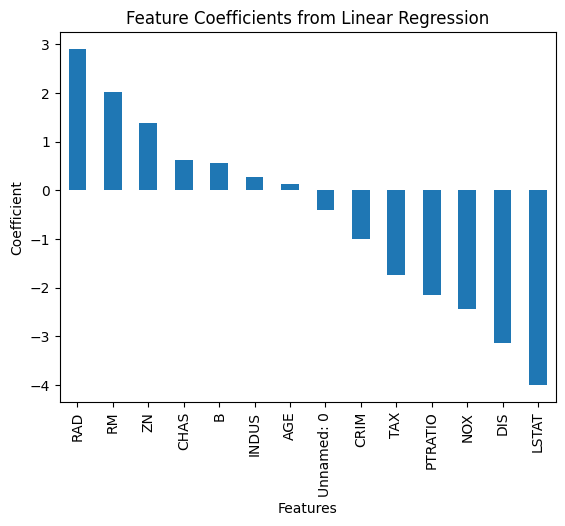

In [18]:

# Plot the coefficients
plt.figure(figsize=(15, 10))
df_m_sorted.plot(x='Features', y='Coefficient', kind='bar', legend=False)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients from Linear Regression')
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.show()

Let’s now generate some of the model performance metrics  such as R2, MSE and MAE. All of these model performance metrics can be generated using the scikit-learn inbuilt packages such as ‘metrics’.

In [19]:
# Calculate the R-squared value for the test data
r2_test = lrm.score(test_x, test_y)
print("R-Squared Value for TEST data is—", np.round(r2_test * 100, 0))

# Calculate the R-squared value for the training data
r2_train = lrm.score(train_x, train_y)

print("R-Squared Value for TRAIN data is—", np.round(r2_train * 100, 0))

R-Squared Value for TEST data is— 78.0
R-Squared Value for TRAIN data is— 72.0


In [20]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

# Make predictions on the test data
predict_test = lrm.predict(test_x)

# Calculate the Mean Squared Error (MSE) for the test data
mse_test = metrics.mean_squared_error(test_y, predict_test)

# Print the MSE rounded to the nearest integer
print("Mean Squared Error (MSE) for TEST data is", np.round(mse_test, 0))

# Calculate the Mean Absolute Error (MAE) for the test data
mae_test = mean_absolute_error(test_y, predict_test)

# Print the MAE rounded to the nearest integer
print("Mean Absolute Error (MAE) for TEST data is", np.round(mae_test, 0))

Mean Squared Error (MSE) for TEST data is 22.0
Mean Absolute Error (MAE) for TEST data is 4.0


In the last step we are appending the predicted house prices into the original data and computing the error in estimation for the test data.

In [21]:
# Create a DataFrame with test features and actual target values
fdf = pd.concat([test_x.reset_index(drop=True), test_y.reset_index(drop=True)], axis=1)

# Add predicted values to the DataFrame
fdf['Predicted'] = np.round(predict_test, 1)

# Calculate the prediction error
fdf['Prediction Error'] = fdf['PRICE'] - fdf['Predicted']

# Display the DataFrame
fdf

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Predicted,Prediction Error
0,0.373110,-0.414778,0.928623,-1.306878,-0.272599,-0.714347,0.804028,0.061346,-0.291089,-0.293081,-1.106115,-0.025677,0.441052,-0.718119,28.2,32.1,-3.9
1,0.619569,-0.417558,1.872854,-1.073423,-0.272599,-0.610687,0.586056,-0.432946,0.920817,-0.523001,-0.227101,-0.395567,0.441052,-0.767180,23.9,27.7,-3.8
2,-1.406866,-0.393837,-0.487722,-0.616727,-0.272599,-0.921667,-0.362767,0.601866,0.900519,-0.752922,-1.040783,-0.256858,0.395440,0.861639,16.6,18.2,-1.6
3,-1.269945,-0.413781,0.048772,-0.739290,-0.272599,-1.258562,-0.579315,-1.677566,1.284902,-0.637962,-0.375583,0.205505,0.433487,-0.638220,22.0,22.0,0.0
4,0.749644,0.007529,-0.487722,1.015999,-0.272599,1.859875,-1.314439,0.982364,-0.804060,1.661245,1.530926,0.806576,0.264416,-0.345257,20.8,19.1,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,-1.447943,-0.405687,-0.487722,-0.616727,-0.272599,-0.921667,0.691480,-2.335437,0.915493,-0.752922,-1.040783,-0.256858,0.315071,-1.095187,26.6,27.7,-1.1
123,0.742798,0.025988,-0.487722,1.015999,-0.272599,1.859875,-0.047918,0.801005,-0.712836,1.661245,1.530926,0.806576,-0.066050,0.215438,19.9,18.9,1.0
124,0.249881,-0.415517,1.765555,-0.848722,-0.272599,-1.293115,0.399425,-1.624226,1.674325,-0.408041,-0.684426,-0.857929,0.164969,-0.440575,24.8,27.1,-2.3
125,1.680709,-0.392690,-0.487722,-0.211099,-0.272599,0.261784,-0.378438,-0.116457,-0.658834,-0.408041,-0.102376,0.344213,0.441052,0.037418,21.2,20.4,0.8


As you can see from the above metrics that overall this plain vanilla regression model is doing a decent job. However, it can be significantly improved upon by either doing feature engineering such as binning, multicollinearity and heteroscedasticity fixes etc. or by leveraging more robust techniques such as Elastic Net, Ridge Regression or SGD Regression, Non Linear models.

**Insights**

1. Model Accuracy and Performance

MAE (4.0): This metric tells you that, on average, the model’s predictions are off by 4.0 units from the actual house prices. MAE provides a direct interpretation of the average error in the units of the target variable (house prices in this case). A lower MAE indicates better model performance.

MSE (22.0): MSE gives you the average squared difference between the predicted and actual values. Since MSE squares the errors, it penalizes larger errors more severely than smaller ones. It provides a measure of how well the model performs, with larger values indicating worse performance. MSE is useful when you want to understand the magnitude of errors and the impact of larger errors.

-----------------------------------------------------

The fact that MSE is higher than MAE suggests that there are some relatively large errors in the predictions. MSE is more sensitive to large errors due to the squaring of differences, while MAE treats all errors equally. This discrepancy indicates that your model may be experiencing some larger prediction errors, even if the average absolute error is relatively smaller.